This notebook investigates pre-burst and non-burst temporal spike windows of size 5, 10, 50, 100, and 500:
* Calculates mean and standard deviation of window widths
* Plots a histogram of window withds
* Plots raster plots of spike windows

Note: window width is number of timesteps in the window, window size is the number of spikes in the window

Author: Mariia Lundvall (lundvm@uw.edu)

In [24]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
def get_window_size(filename):
    """
    Extracts the window size from the filename. The filename must be in a form: typeofdata_window.csv, 
    e.g. temp_5.csv or space_100.csv

    Args:
        filename(str): the name the file

    Returns:
        int: window size
    """

    if filename[-8] == '_':
        return int(filename[-7:-4])
    elif filename[-6] == '_':
        return int(filename[-5])
    else:
        return int(filename[-6:-4])

    return None

In [26]:
def prepare_data(filename, seed):
    """
    Prepares data for plotting. Reads in a file with the temporal data into a dataframe, removes 
    the labels, and samples 1% of data (~100 pre-burst and ~100 non-burst examples) for plotting.

    Args:
        filename(str): the name of the file to process

    Returns:
        pre_bursts(2d numpy array): array with the pre-burst data
        non_bursts(2d numpy array): array with the non-burst data
    """

    window_size = get_window_size(filename)
    data = pd.read_csv(filename, header=None)
    pre_bursts = data[data[window_size] == 1].sample(
        frac=0.01, random_state=seed).drop(window_size, axis=1).values
    non_bursts = data[data[window_size] == 0].sample(
        frac=0.01, random_state=seed).drop(window_size, axis=1).values

    return pre_bursts, non_bursts

In [27]:
def plot_data(pre_bursts, non_bursts):
    """
    Creates raster plots of temporal data. 

    Args:
        pre_bursts(2d numpy array): array with the pre-burst data
        non_bursts(2d numpy array): array with the non-burst data
        window_size(int): window size

    Returns:
        none
    """
    colors = [[0, 0, 0]]
    fig, axs = plt.subplots(2, figsize=(10, 15), sharex=True, sharey=True)
    axs[0].eventplot(pre_bursts, colors=colors)
    axs[1].eventplot(non_bursts, colors=colors)
    axs[0].set_title('Pre-bursts')
    axs[1].set_title('Non-bursts')
    axs[1].set_xlabel('Time Step')
    axs[0].set_xlabel('Time Step')
    axs[1].set_ylabel('Spikes')
    axs[0].set_ylabel('Spikes')

    plt.show()

In [28]:
def mean_std(filename):
    """
    Calculates mean and standard deviation of window widths. 

    Args:
        filename(str): the name of the file containing temporal data

    Returns:
        nb_mean(float): mean of non-burst window widths
        nb_std(float): standard deviation of non-burst window widths
        pb_mean(float): mean of pre-burst window widths
        pb_std(float): standard deviation of pre-burst window widths    
    """
    window_size = get_window_size(filename)

    data = pd.read_csv(filename, header=None)
    non_bursts = data[data[window_size] == 0][window_size-1].values
    pre_bursts = data[data[window_size] == 1][window_size-1].values

    nb_mean = np.mean(non_bursts)
    nb_std = np.std(non_bursts)
    pb_mean = np.mean(pre_bursts)
    pb_std = np.std(pre_bursts)

    return nb_mean, nb_std, pb_mean, pb_std

In [29]:
def plot_window_size_hist(filename):
    """
    Plots a histogram of the window widths for the data in the given file.

    Args:
        filename(str): the name of the file containing temporal data

    Returns:
        none

    """

    window_size = get_window_size(filename)

    data = pd.read_csv(filename, header=None)
    non_bursts = data[data[window_size] == 0][window_size-1].values
    pre_bursts = data[data[window_size] == 1][window_size-1].values

    fig, axs = plt.subplots(2, figsize=(10, 15), sharex=True)
    axs[0].hist(pre_bursts)
    axs[1].hist(non_bursts)
    axs[0].set_title('Pre-bursts')
    axs[1].set_title('Non-bursts')
    axs[1].set_xlabel('Window Width')
    axs[0].set_xlabel('Window Width')
    axs[1].set_ylabel('Window Count')
    axs[0].set_ylabel('Window Count')

    plt.show()

In [33]:
# seed for sampling data
seed = random.seed(1)

Analyzing spike windows of size 5

Mean and standard deviation of non-burst window widths: 18.414315139031928, 9.495807575091181
Mean and standard deviation of pre-burst window widths: 1.1186405767250258, 0.9899248406184208


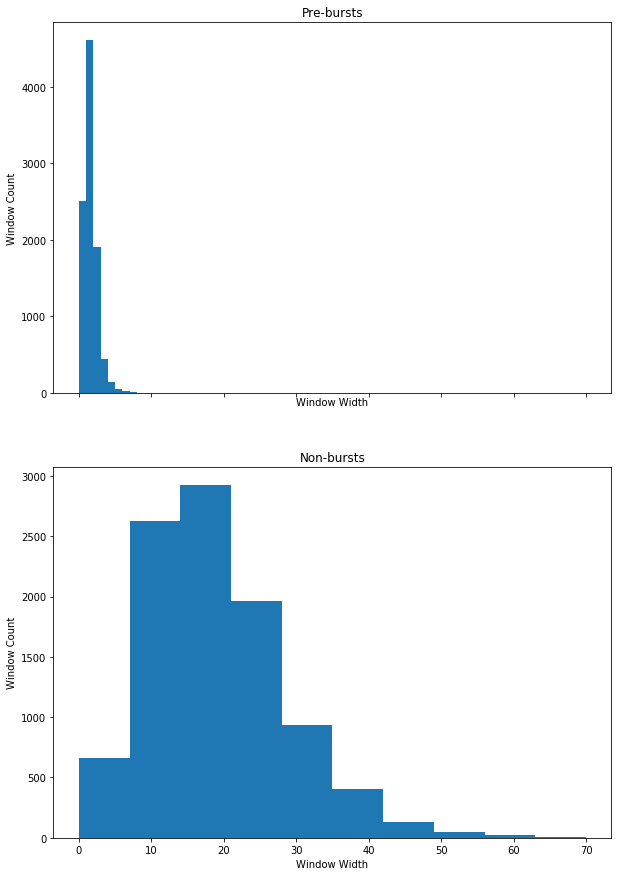

In [30]:
filename5 = 'train_data/temp_5.csv'
print('Analyzing spike windows of size 5\n')
nb_mean, nb_std, pb_mean, pb_std = mean_std(filename5)
print('Mean and standard deviation of non-burst window widths: ' +
      str(nb_mean) + ', ' + str(nb_std))
print('Mean and standard deviation of pre-burst window widths: ' +
      str(pb_mean) + ', ' + str(pb_std))

plot_window_size_hist(filename5)

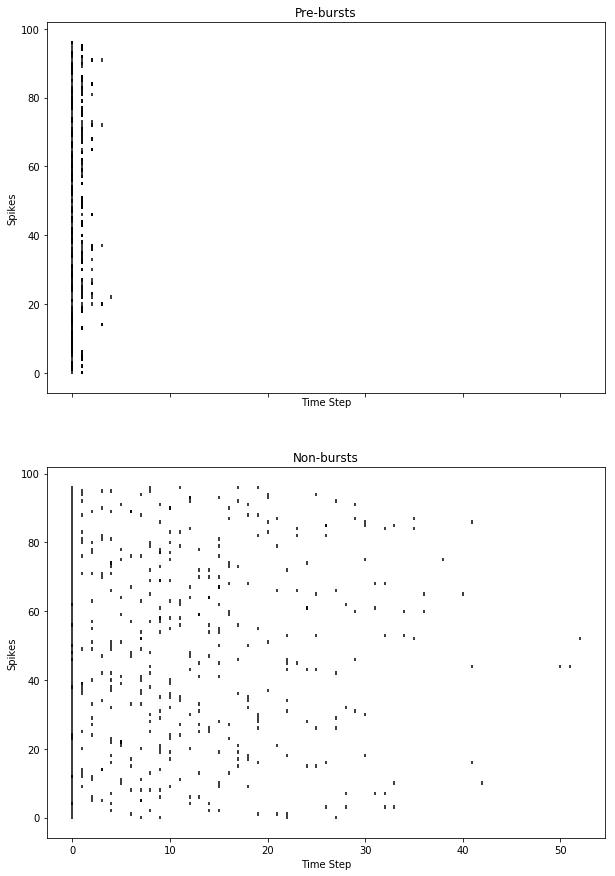

In [34]:
pre_bursts_5, non_bursts_5 = prepare_data(filename5, seed)
plot_data(pre_bursts_5, non_bursts_5)

Analyzing spike windows of size 10

Mean and standard deviation of non-burst window widths: 41.431410916580845, 14.881031199631707
Mean and standard deviation of pre-burst window widths: 2.9637487126673534, 1.8324582248764905


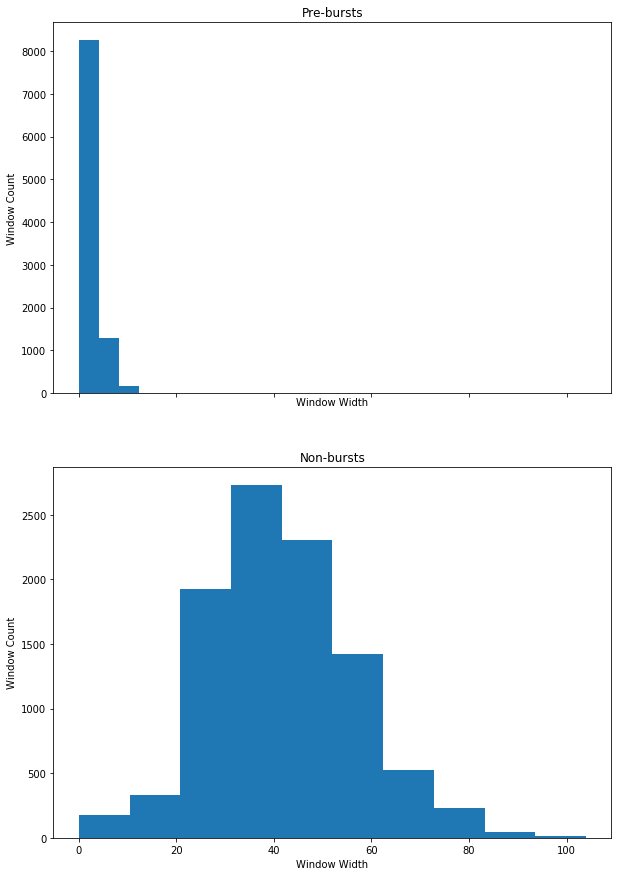

In [35]:
filename10 = 'train_data/temp_10.csv'
print('Analyzing spike windows of size 10\n')
nb_mean, nb_std, pb_mean, pb_std = mean_std(filename10)
print('Mean and standard deviation of non-burst window widths: ' +
      str(nb_mean) + ', ' + str(nb_std))
print('Mean and standard deviation of pre-burst window widths: ' +
      str(pb_mean) + ', ' + str(pb_std))

plot_window_size_hist(filename10)

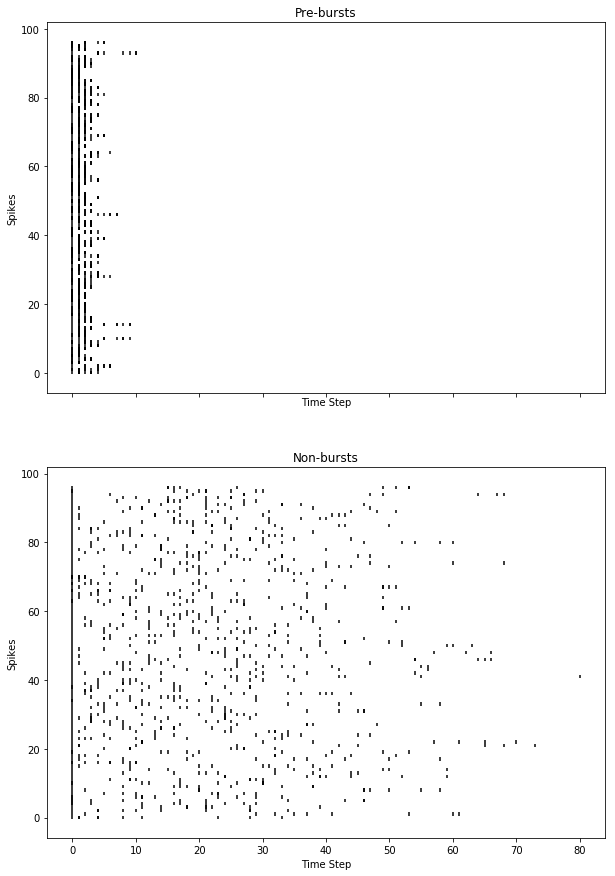

In [36]:
pre_bursts_10, non_bursts_10 = prepare_data(filename10, seed)
plot_data(pre_bursts_10, non_bursts_10)

Analyzing spike windows of size 50

Mean and standard deviation of non-burst window widths: 226.10442842430484, 43.36811049833096
Mean and standard deviation of pre-burst window widths: 31.520185375901132, 32.67146568170088


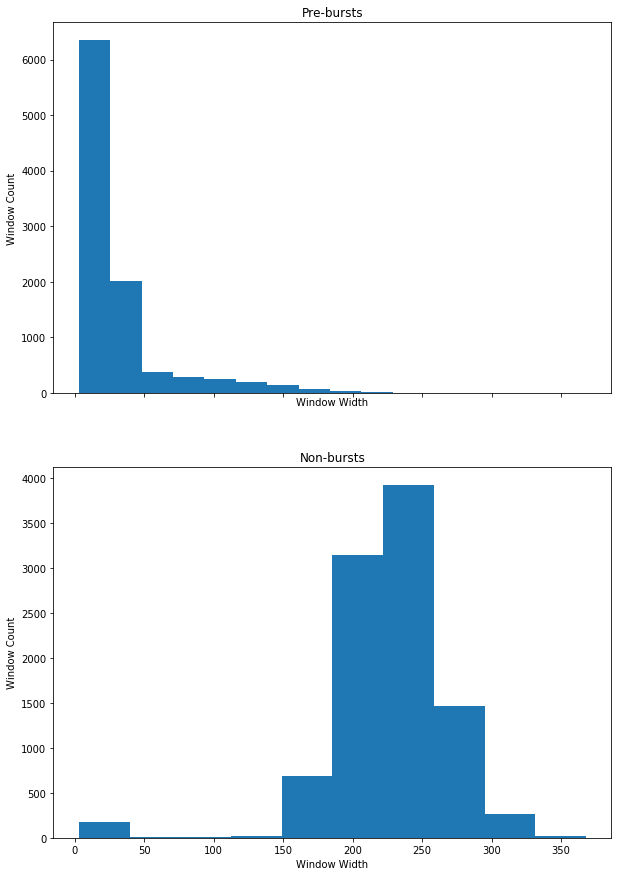

In [37]:
filename50 = 'train_data/temp_50.csv'
print('Analyzing spike windows of size 50\n')
nb_mean, nb_std, pb_mean, pb_std = mean_std(filename50)
print('Mean and standard deviation of non-burst window widths: ' +
      str(nb_mean) + ', ' + str(nb_std))
print('Mean and standard deviation of pre-burst window widths: ' +
      str(pb_mean) + ', ' + str(pb_std))

plot_window_size_hist(filename50)

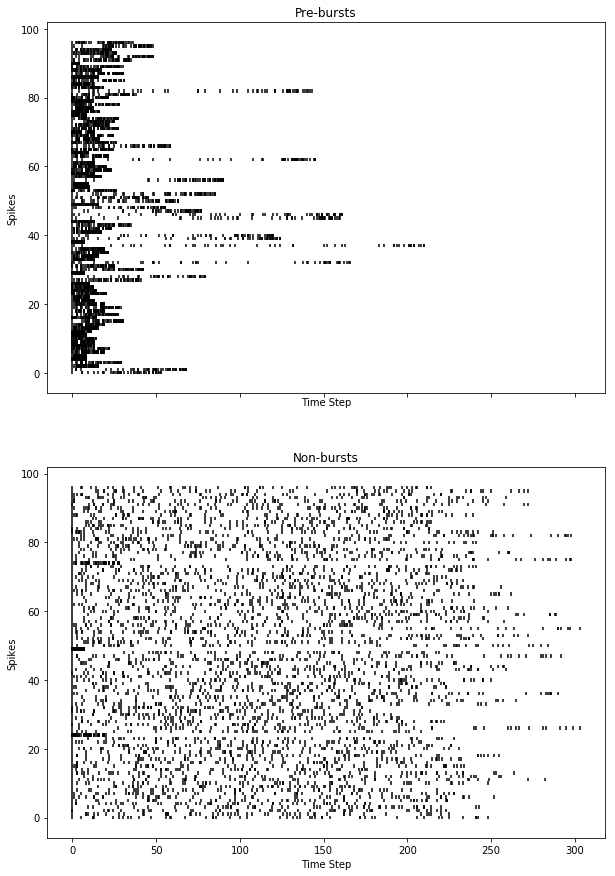

In [38]:
pre_bursts_50, non_bursts_50 = prepare_data(filename50, seed)
plot_data(pre_bursts_50, non_bursts_50)

Analyzing spike windows of size 100

Mean and standard deviation of non-burst window widths: 456.7142121524202, 74.4922116200177
Mean and standard deviation of pre-burst window widths: 132.48331616889806, 112.66489176755456


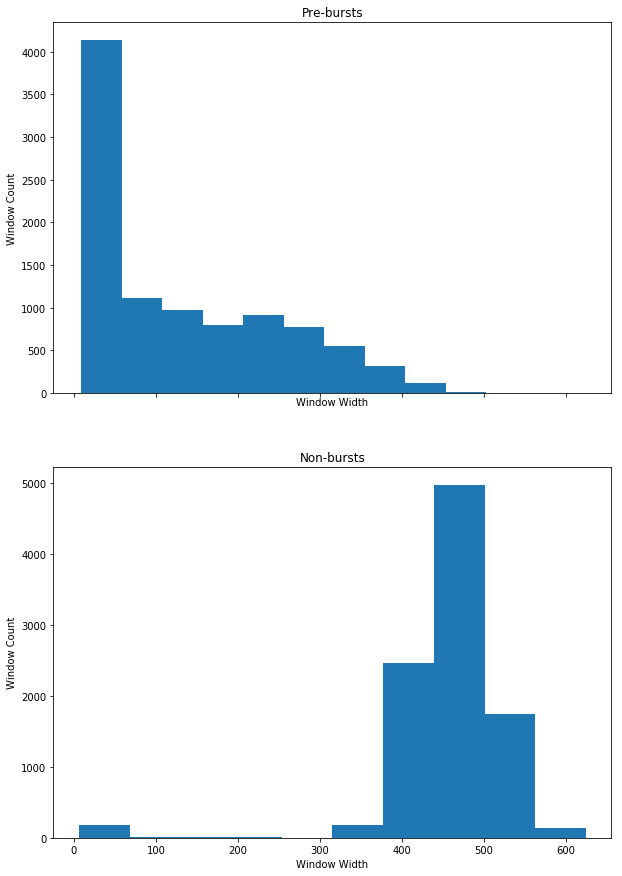

In [40]:
filename100 = 'train_data/temp_100.csv'
print('Analyzing spike windows of size 100\n')
nb_mean, nb_std, pb_mean, pb_std = mean_std(filename100)
print('Mean and standard deviation of non-burst window widths: ' +
      str(nb_mean) + ', ' + str(nb_std))
print('Mean and standard deviation of pre-burst window widths: ' +
      str(pb_mean) + ', ' + str(pb_std))

plot_window_size_hist(filename100)

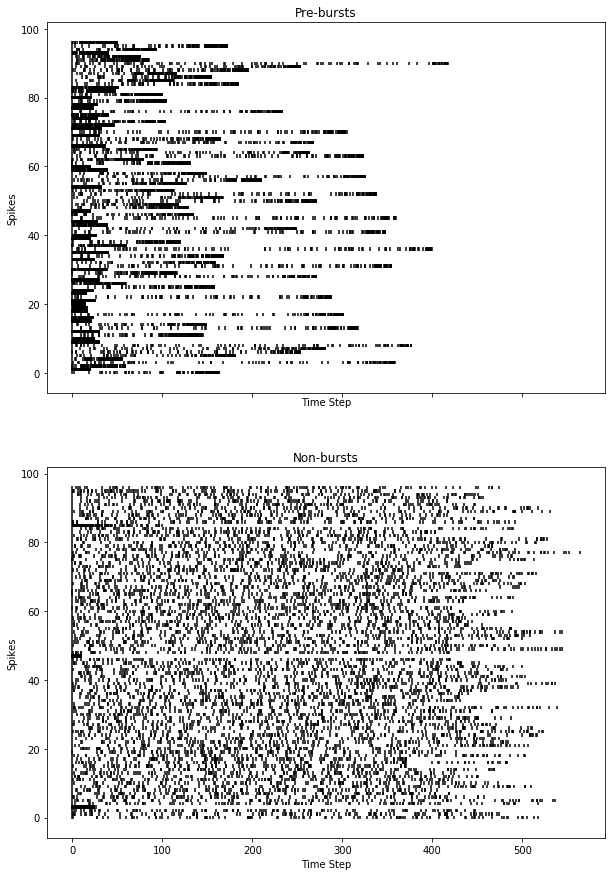

In [42]:
pre_bursts_100, non_bursts_100 = prepare_data(filename100, seed)
plot_data(pre_bursts_100, non_bursts_100)

Analyzing spike windows of size 500

Mean and standard deviation of non-burst window widths: 2280.7859938208035, 363.14268803578824
Mean and standard deviation of pre-burst window widths: 1818.4065911431514, 447.3078648199474


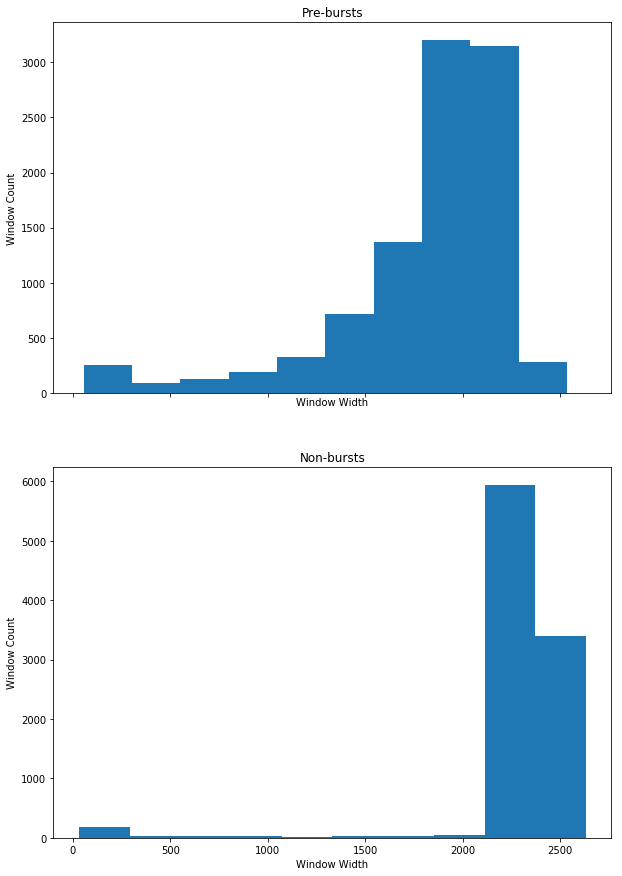

In [39]:
filename500 = 'train_data/temp_500.csv'
print('Analyzing spike windows of size 500\n')
nb_mean, nb_std, pb_mean, pb_std = mean_std(filename500)
print('Mean and standard deviation of non-burst window widths: ' +
      str(nb_mean) + ', ' + str(nb_std))
print('Mean and standard deviation of pre-burst window widths: ' +
      str(pb_mean) + ', ' + str(pb_std))

plot_window_size_hist(filename500)

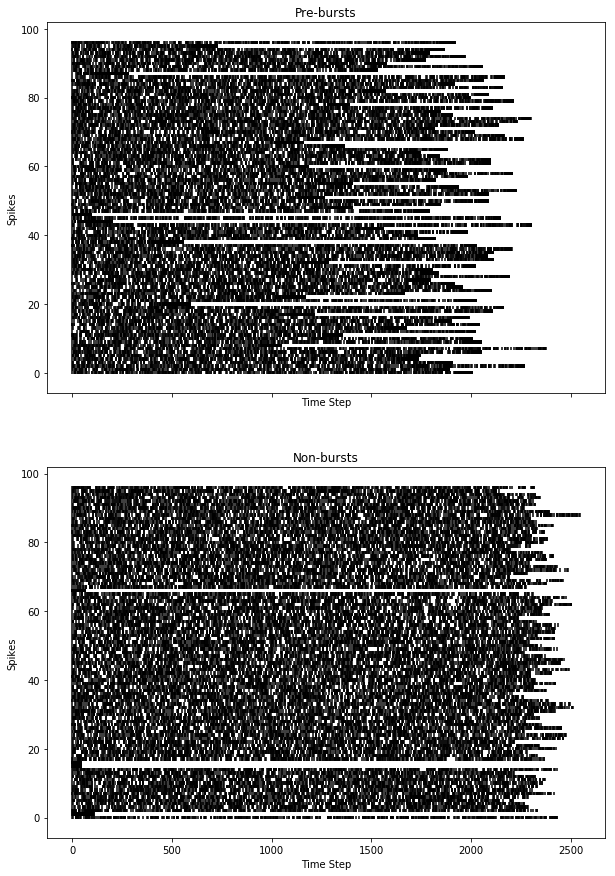

In [44]:
pre_bursts_500, non_bursts_500 = prepare_data(filename500, seed)
plot_data(pre_bursts_500, non_bursts_500)